In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Cargar dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Añadir dimensión de canal (necesaria para Conv2D)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

***Crear la red CNN***

In [3]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Miguel\Desktop\Miguelon\GH\Inteligencia_Artificial_Activities\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Explicación rápida:

Conv2D(32, (3,3)): 32 filtros de 3×3 que escanean la imagen.

MaxPooling2D(2,2): reduce resolución a la mitad.

Flatten(): convierte la imagen en un vector.

Dense(64): neuronas de decisión intermedia.

Dense(10, softmax): 10 clases (dígitos del 0 al 9).

**Compilar y entrenar**

In [4]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9586 - loss: 0.1352 - val_accuracy: 0.9843 - val_loss: 0.0501
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9857 - loss: 0.0451 - val_accuracy: 0.9875 - val_loss: 0.0361
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9891 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9912 - val_loss: 0.0271
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9948 - loss: 0.0171 - val_accuracy: 0.9906 - val_loss: 0.0313


***Evaluar el modelo***

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9906 - loss: 0.0313

Precisión en test: 0.9906


***Visualizar predicciones***

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


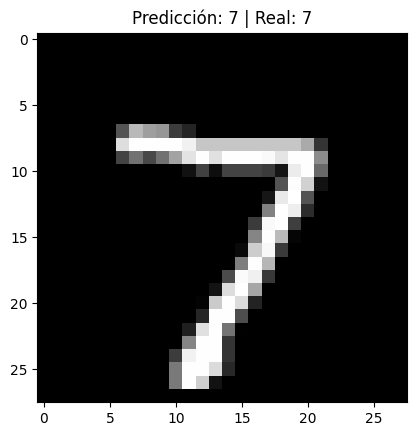

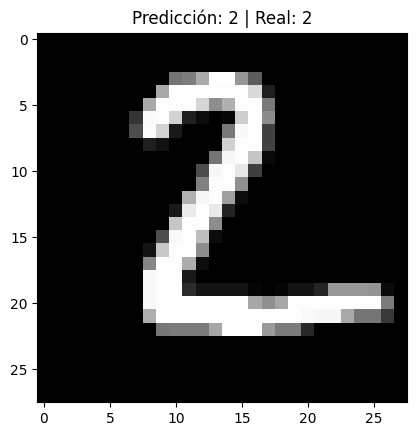

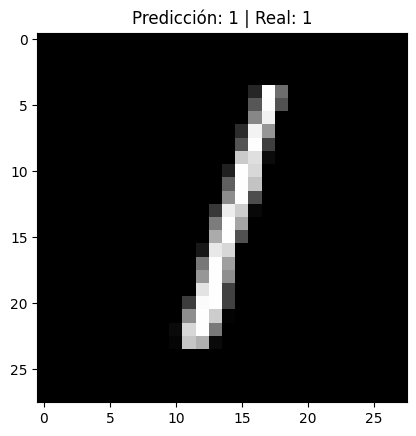

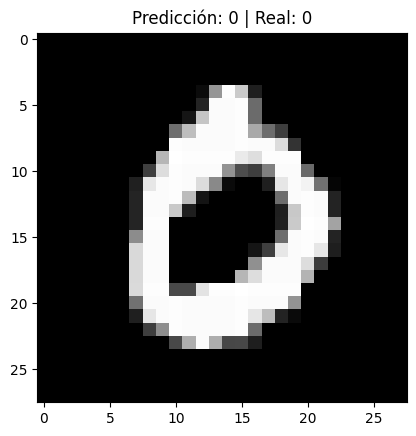

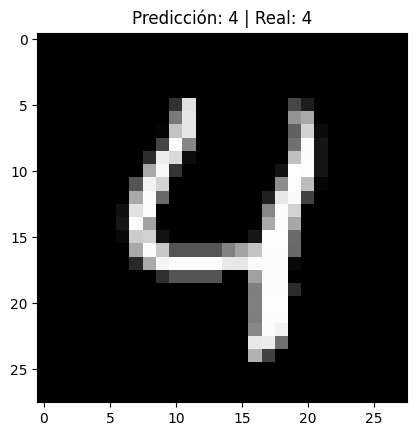

In [6]:
import numpy as np

predictions = model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicción: {np.argmax(predictions[i])} | Real: {y_test[i]}")
    plt.show()

***Mostrar los filtros de la primera capa convolucional***

Forma de los filtros: (3, 3, 1, 32)


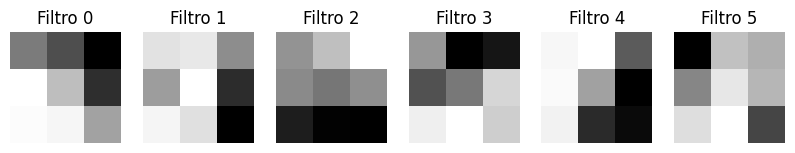

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la primera capa convolucional
primera_capa = model.layers[0]
pesos, sesgos = primera_capa.get_weights()

print("Forma de los filtros:", pesos.shape)  # (3, 3, 1, 32)

# Normalizar los filtros para visualizarlos
filtros = (pesos - pesos.min()) / (pesos.max() - pesos.min())

# Mostrar algunos filtros
n_filtros = 6
plt.figure(figsize=(10,3))
for i in range(n_filtros):
    filtro = filtros[:, :, 0, i]
    plt.subplot(1, n_filtros, i+1)
    plt.imshow(filtro, cmap='gray')
    plt.axis('off')
    plt.title(f"Filtro {i}")
plt.show()
